In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb

In [212]:
dados = pd.read_csv("/content/streaming_data.csv")

In [213]:
dados.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


In [214]:
# Descrição estatística + verificação do tipo dos dados + verificação de valores faltantes

In [215]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [216]:
descricao = dados.describe()
print(descricao)

                Age  Time_on_platform  Devices_connected  \
count  66607.000000      56464.000000       52696.000000   
mean      43.511072       4385.848505           2.995370   
std       15.043158       2526.580859           1.414072   
min       18.000000          0.000000           1.000000   
25%       30.000000       2196.000000           2.000000   
50%       43.000000       4384.000000           3.000000   
75%       57.000000       6573.000000           4.000000   
max       69.000000       8759.000000           5.000000   

       Num_streaming_services  Num_active_profiles    Avg_rating       Churned  
count             9572.000000         77884.000000  60614.000000  61148.000000  
mean                 2.496239             3.002273      3.002252      0.243066  
std                  1.120700             1.413235      1.154963      0.428938  
min                  1.000000             1.000000      1.000000      0.000000  
25%                  1.000000             2.000000    

In [217]:
tipos_dados = dados.dtypes
print(tipos_dados)

Age                       float64
Gender                     object
Time_on_platform          float64
Devices_connected         float64
Subscription_type          object
Num_streaming_services    float64
Num_active_profiles         int64
Avg_rating                float64
Churned                   float64
User_id                    object
dtype: object


In [218]:
valores_faltantes = dados.isnull().sum()
print(valores_faltantes)

Age                       11277
Gender                    14516
Time_on_platform          21420
Devices_connected         25188
Subscription_type         25221
Num_streaming_services    68312
Num_active_profiles           0
Avg_rating                17270
Churned                   16736
User_id                       0
dtype: int64


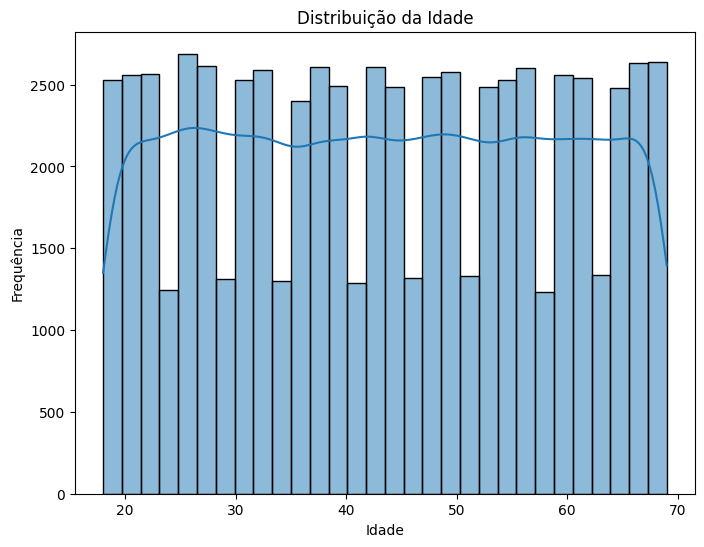

In [219]:
plt.figure(figsize=(8, 6))
sns.histplot(dados['Age'], bins=30, kde=True)
plt.title('Distribuição da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

In [220]:
# Substituindo valores “NaN” por 0 Colunas + Dropando linhas nulas + Transformando valores churned 0 e 1 por No e Yes + Transformando valores floats em valores inteiros

In [221]:
colunas_substituir_nan = ['Time_on_platform', 'Num_streaming_services', 'Churned', 'Avg_rating', 'Devices_connected']
dados[colunas_substituir_nan] = dados[colunas_substituir_nan].fillna(0)

In [222]:
colunas_descartar_nulas = ['Gender', 'Subscription_type', 'Age']
dados = dados.dropna(subset=colunas_descartar_nulas)


In [223]:
dados['Churned'] = dados['Churned'].replace({0: 'No', 1: 'Yes'})

In [39]:
colunas_float_para_int = ['Time_on_platform', 'Num_streaming_services', 'Avg_rating', 'Devices_connected']
dados[colunas_float_para_int] = dados[colunas_float_para_int].astype(int)

<ipython-input-39-cd0d0945119d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados[colunas_float_para_int] = dados[colunas_float_para_int].astype(int)


In [224]:
#Definir variáveis X e y para o modelo + Realizar o .fit do modelo + Separar em train e test + Realizar a modelagem + Plotar matrix confusão + Printar métricas

In [225]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [226]:
X = dados.drop(columns=['Churned', 'User_id'])
y = dados['Churned']

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [228]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Gender', 'Subscription_type'])
    ], remainder='passthrough')

In [229]:
#utilizando pipeline para pré-processamento das variáveis
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [230]:
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['Gender',
                                                   'Subscription_type'])])),
                ('classifier', LogisticRegression())])

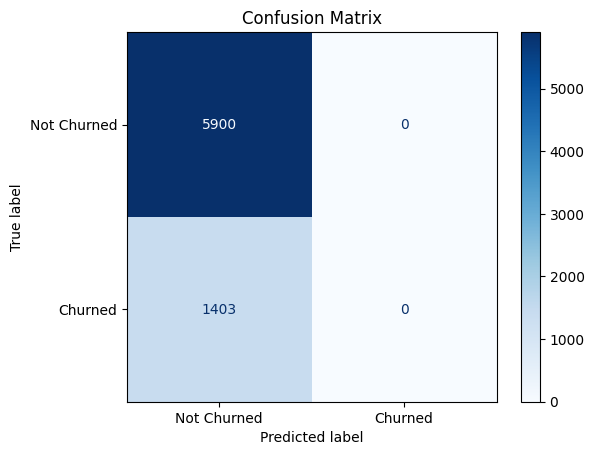

In [231]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Churned', 'Churned'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [232]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

          No       0.81      1.00      0.89      5900
         Yes       0.00      0.00      0.00      1403

    accuracy                           0.81      7303
   macro avg       0.40      0.50      0.45      7303
weighted avg       0.65      0.81      0.72      7303



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Definir variáveis X e y para o modelo + Realizar o .fit do modelo + Separar em train e test + Realizar a modelagem + Plotar matrix confusão + Printar métricas


In [233]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


In [234]:
X = dados.drop(columns=['Churned', 'User_id'])
y = dados['Churned']

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [236]:
# Pipeline para pré-processamento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), ['Age', 'Time_on_platform', 'Num_streaming_services', 'Num_active_profiles', 'Avg_rating', 'Devices_connected']),
        ('cat', OneHotEncoder(), ['Gender', 'Subscription_type'])
    ], remainder='passthrough')

In [237]:
#regressão logística
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [238]:
#parâmetros
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__max_iter': [100, 200, 300, 400, 500]
}

In [239]:
#hiperparâmetros
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['Age',
                                                                          'Time_on_platform',
                                                                          'Num_streaming_services',
                                                                          'Num_active_profiles',
                                                                          'Avg_rating',
                                                                          'Devices_connected']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['Gender',
                                                                          'Subscription_type'])])),
                                       ('classifier', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'classifier__max_iter': [100, 200, 300, 400, 500]})

In [240]:
best_model = grid_search.best_estimator_

In [241]:
#previsões
y_pred = best_model.predict(X_test)

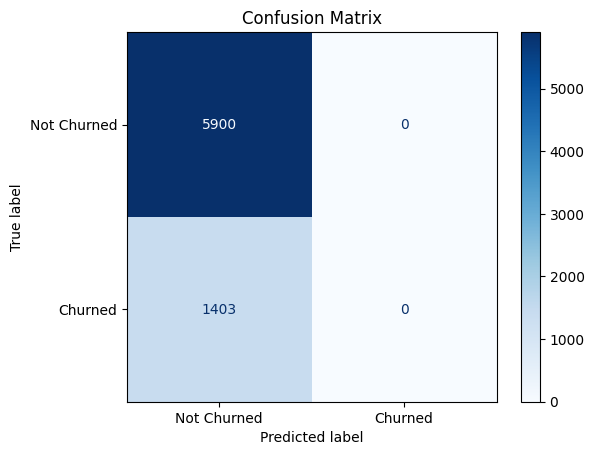

In [242]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Churned', 'Churned'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [293]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

          No       0.81      1.00      0.89      5900
         Yes       0.00      0.00      0.00      1403

    accuracy                           0.81      7303
   macro avg       0.40      0.50      0.45      7303
weighted avg       0.65      0.81      0.72      7303



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [326]:
# A. montagem do grid search
# b. .fit do modelo
# c. Tunning
# d.  modelagem
# e. Plotando matrix confusão
# f. Printando métricas


In [318]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [319]:
# Reduzindo o tamanho dos dados
X_train_sample = X_train_encoded.sample(frac=0.2, random_state=42)
y_train_sample = y_train.sample(frac=0.2, random_state=42)

#hiperparâmetros
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

#modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)

In [320]:
#inicializando a grade de pesquisa e ajustando modelo
grid_search = GridSearchCV(rf_model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_sample, y_train_sample)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]})

In [321]:
#transformar os dados usando o pré-processador
preprocessor.fit(X_train)
X_test_encoded = preprocessor.transform(X_test)

In [322]:
#previsões do modelo
y_pred = grid_search.predict(X_test_encoded)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [323]:
# Calculando a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

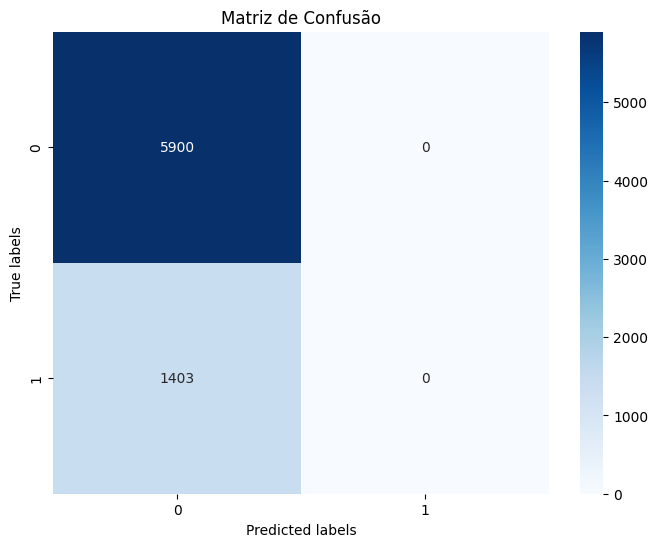

In [324]:
#matriz de confusão usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Matriz de Confusão')
plt.show()

In [328]:
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          No       0.81      1.00      0.89      5900
         Yes       0.00      0.00      0.00      1403

    accuracy                           0.81      7303
   macro avg       0.40      0.50      0.45      7303
weighted avg       0.65      0.81      0.72      7303



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
